## Import the necessary software libraries:

In [12]:
import numpy as np
import matplotlib.pyplot as plt

from envs import Maze
from utils import plot_policy, plot_action_values, test_agent

## Create the environment, value table and policy

#### Create the environment

In [13]:
env = Maze()

#### Create the $Q(s, a)$ table

In [14]:
action_values = np.zeros(shape=(5, 5, 4))

#### Create the policy $\pi(s)$

In [15]:
def policy(state, epsilon=0.2):
    if np.random.random() < epsilon:
        return np.random.randint(4)
    else:
        av = action_values[state]
        return np.random.choice(np.flatnonzero(av == av.max()))

#### Plot the value table $Q(s,a)$

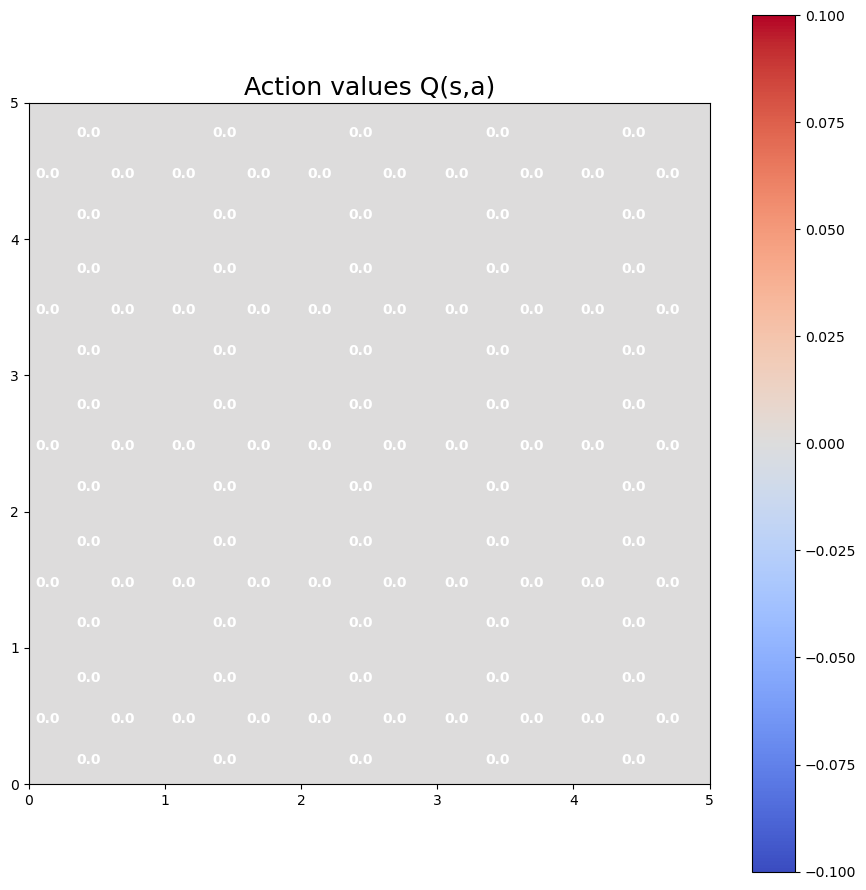

In [16]:
plot_action_values(action_values)

#### Plot the policy

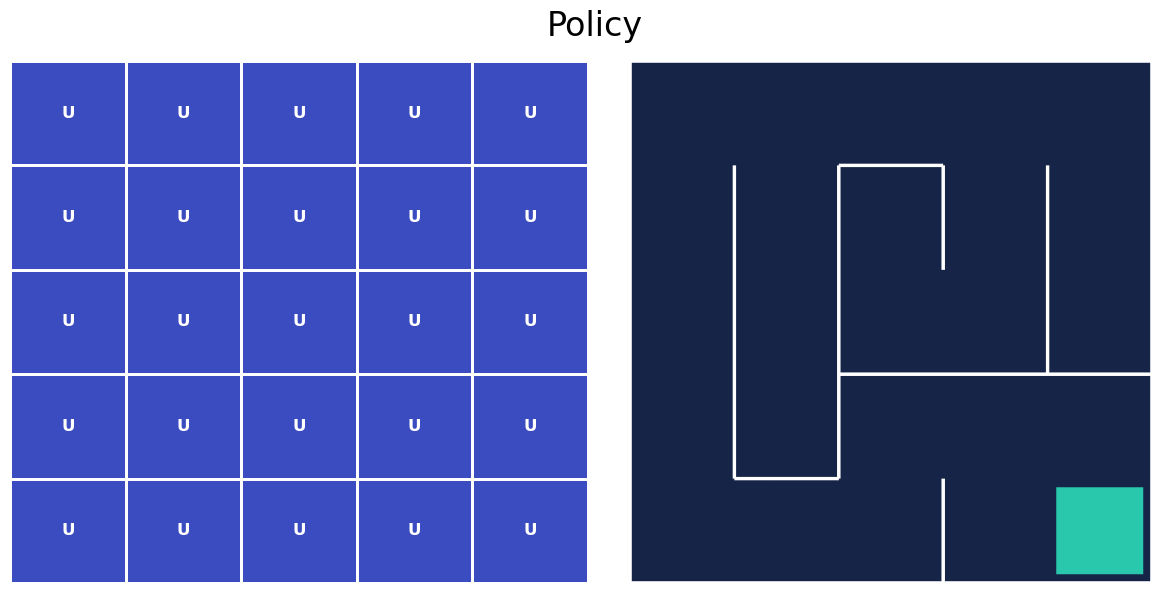

In [17]:
plot_policy(action_values, env.render(mode='rgb_array'))

## Implement the algorithm

</br>



<div style="text-align:center">
    Adapted from Barto & Sutton: "Reinforcement Learning: An Introduction".
</div>

In [18]:
def sarsa(action_values, policy, episodes, alpha=0.1, gamma=0.99, epsilon=0.2):
    
    for episode in range(1, episodes + 1):
        state = env.reset()
        action = policy(state, epsilon)
        done = False
        while not done:
            next_state, reward, done, _ = env.step(action)
            next_action = policy(next_state, epsilon)
            
            qsa = action_values[state][action]
            next_qsa = action_values[next_state][next_action]
            action_values[state][action] = qsa + alpha * (reward + gamma * next_qsa - qsa)
            state = next_state
            action = next_action

In [19]:
sarsa(action_values, policy, 100)

## Show results

#### Show resulting value table $Q(s,a)$

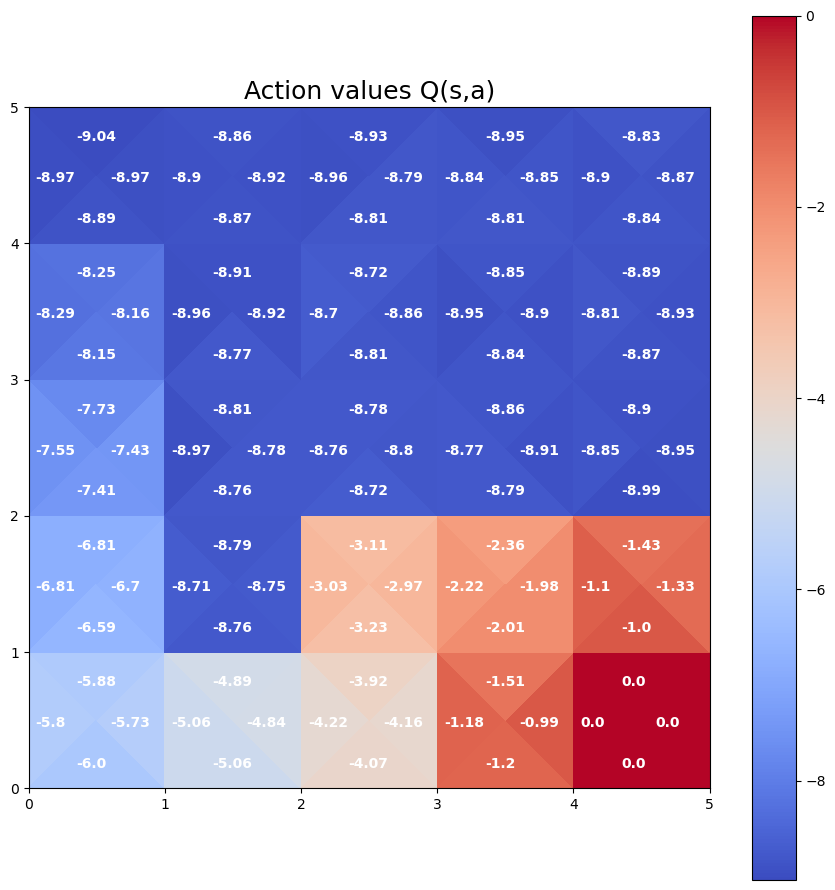

In [20]:
plot_action_values(action_values)

#### Show resulting policy $\pi(\cdot|s)$

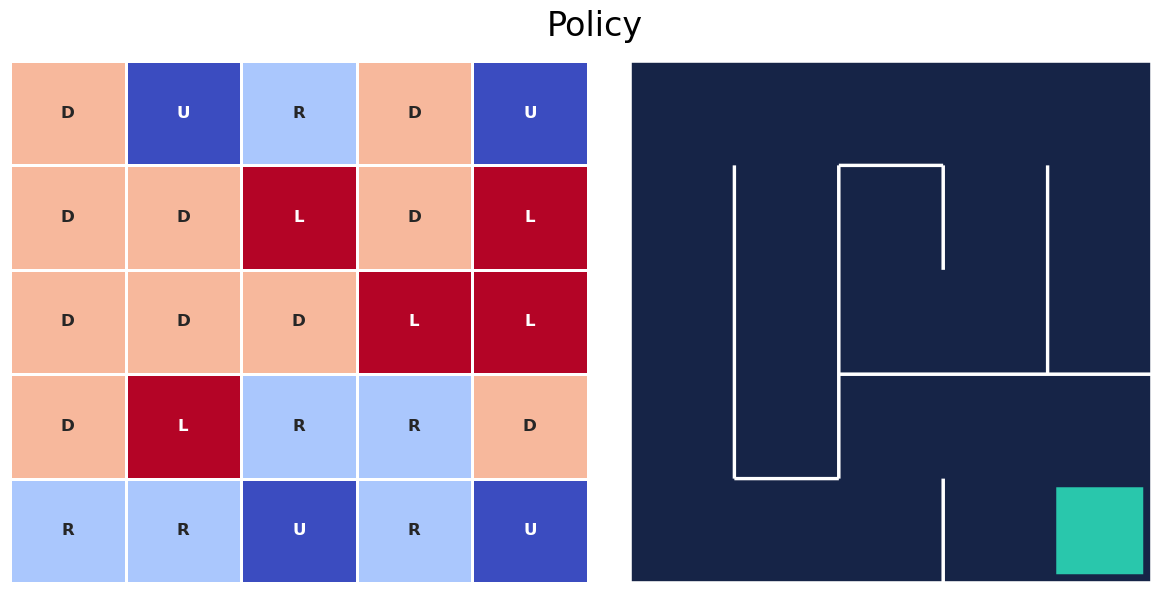

In [21]:
plot_policy(action_values, env.render(mode='rgb_array'))

#### Test the resulting agent

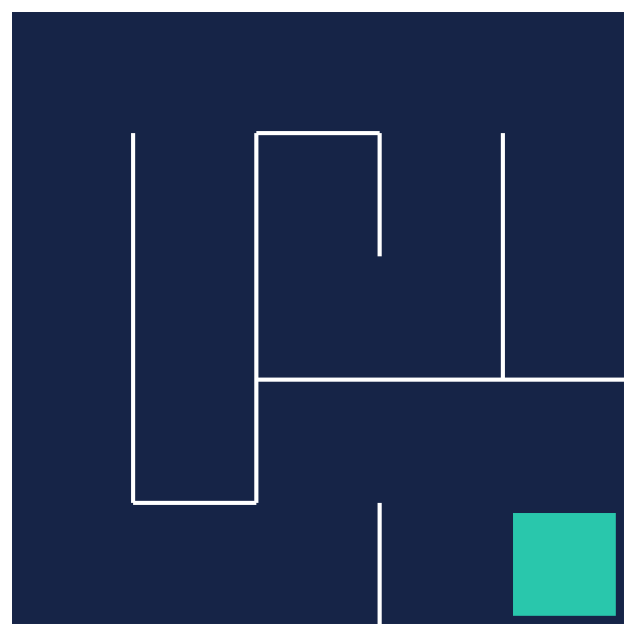

In [22]:
test_agent(env, policy)